
Сортированная выборка UD-2 :




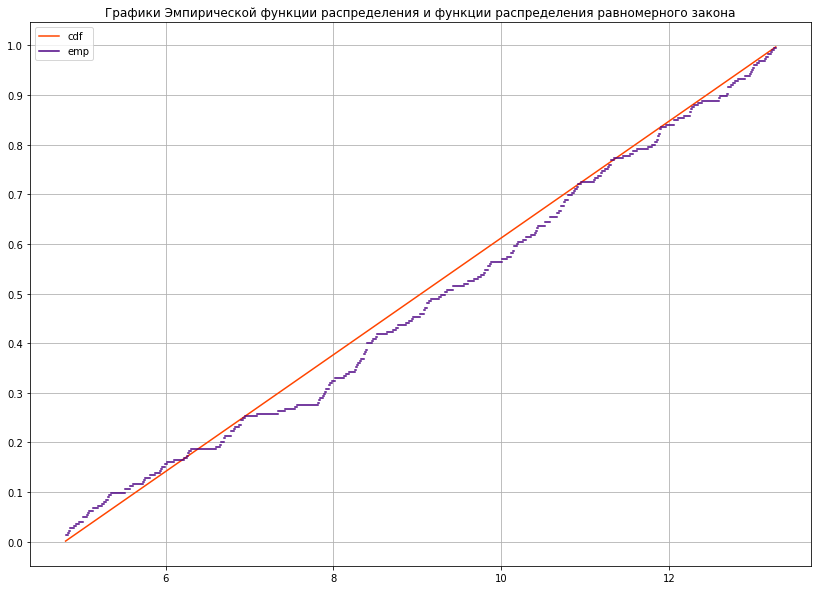

a = 4.8; b = 13.3
N =  225
D_N = 0.0799644444444445
D_N * sqrt(N) = 1.1994666666666676
x* = 7.82192
F(x*) = 0.35552000000000006
F_N(x*) = 0.28
F_N(x* -0) = 0.27555555555555555

Критерий Колмогорова


KstestResult(statistic=0.0799644444444445, pvalue=0.10657213931820819)

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from copy import deepcopy
    
def revread(f):
    return np.array(list(map(float, f.read().replace(',', '.').split())))

def show_distrib(distrib):       #
    for i in range(len(distrib)):
        print(distrib[i], end="\t")
        if (i+1)%9==0:
            print()
    print()
    
def F(x):
    a=4.8
    b=13.3
    if x<a:
        return 0
    elif x>b:
        return 1
    elif x<=b and x>=a:
        return (x-a)/(b-a)


f = open('UD-2.txt') # равномерная выборка
# f = open('UD-3.txt')  # случайные величины
distrib_ud2 = revread(f)
#show_distrib(distrib_ud2)


distrib_ud2.sort()
print("\nСортированная выборка UD-2 :\n")
#show_distrib(distrib_ud2)


N = len(distrib_ud2)


# a=4.80; b=13.3
a=4.8
b=13.3
# Графики Эмпирической функции распределения и функции распределения равномерного закона

emp_distrib_func=[]
y_emp = []

for i in range(1, N):
    y_emp.append(distrib_ud2[i-1])
    emp_distrib_func.append(i/N)
    
    y_emp.append(distrib_ud2[i])
    emp_distrib_func.append(i/N) 
    
    y_emp.append(np.nan)
    emp_distrib_func.append(np.nan)

    
# функции распределения равномерного закона
y_cdf = np.linspace(distrib_ud2[0], distrib_ud2[distrib_ud2.size -1], num=500)
print()

cdf = np.array([F(i) for i in y_cdf])

fig = plt.figure(figsize=(14, 10))


plt.plot(y_cdf, cdf, 'orangered', label='cdf') # функции распределения равномерного закона
plt.plot(y_emp, emp_distrib_func, 'indigo', label='emp') # Эмпирическая функция распределения
plt.legend(loc='upper left')
plt.title("Графики Эмпирической функции распределения и функции распределения равномерного закона")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid(True)
plt.show()

print("a = "+str(a)+"; b = "+str(b))

print("N = ", N)
D_N = -10000
xstar = 0
i=1
for j in range(1, N+1):
    x = distrib_ud2[j-1]
    
    if max(abs(j/N - F(x)), abs((j-1)/N - F(x))) > D_N :
        D_N = max(abs(j/N - F(x)), abs((j-1)/N - F(x)))
        xstar = x
        i=j
        
print("D_N =", D_N)
print("D_N * sqrt(N) =", D_N * math.sqrt(N))
print("x* =", xstar)
print("F(x*) =", F(xstar))
print("F_N(x*) =", i/N)
print("F_N(x* -0) =", (i-1)/N)
    
# второй способ проверки с помощью критерия Колмогорова
print("\nКритерий Колмогорова")
ss.kstest(distrib_ud2, 'uniform', (a, b-a))



Сортированная выборка UD-3 :



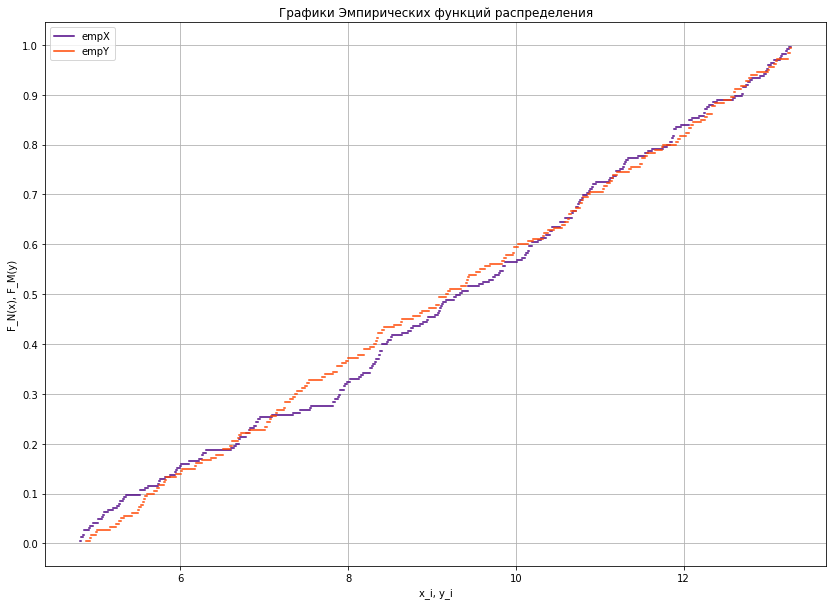

N = 225 
M = 180
D_NM = 0.06888888888888889
K_NM = 0.6888888888888889
x* = 7.82192
F_N(x*) = 0.27555555555555555
F_N(x* -0) = 0.27555555555555555
F_M(x*) = 0.34444444444444444
F_M(x* -0) = 0.34444444444444444

Критерий Колмогорова


Ks_2sampResult(statistic=0.06888888888888889, pvalue=0.7147060855352749)

In [16]:
f = open('UD-3.txt')  # случайные величины
distrib_ud3 = revread(f)
#show_distrib(distrib_ud3)

distrib_ud3.sort()
print("\nСортированная выборка UD-3 :\n")
#show_distrib(distrib_ud3)

M = distrib_ud3.size

emp_distrib_func2=[]
y_emp2 = []

for i in range(1, M):
    y_emp2.append(distrib_ud3[i-1])
    emp_distrib_func2.append(i/M)
    
    y_emp2.append(distrib_ud3[i])
    emp_distrib_func2.append(i/M) 
    
    y_emp2.append(np.nan)
    emp_distrib_func2.append(np.nan)



#cdf2 = np.array([F(i) for i in y_cdf2])

fig = plt.figure(figsize=(14,10))


plt.plot(y_emp, emp_distrib_func, 'indigo', label='empX') # Эмпирическая функция распределения # функции распределения равномерного закона
plt.plot(y_emp2, emp_distrib_func2, 'orangered', label='empY') # Эмпирическая функция распределения # Эмпирическая функция распределения
plt.legend(loc='upper left')
plt.title("Графики Эмпирических функций распределения")
plt.xlabel("x_i, y_i")
plt.ylabel("F_N(x), F_M(y)")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid(True, which='both')
plt.show()

def F_M(x, dis=distrib_ud3): # x - UD-2(x), dis= UD-3(y)
    if x < dis[0]:
        #print("x=", x)
        #print("dis=",dis[0])
        #print()
        return 0
    elif x > dis[len(dis)-1]: # x больше последнего элемента
        return 1
    else:
        for i in range(len(dis)):
            if dis[i] <= x and x <= dis[i+1]:
                return (i+1)/len(dis) #тк выборка начинается с k=1
        
def F_N(y, dis=distrib_ud2):  # y - UD-3(y), dis= UD-2(x)
    if y < dis[0]:
        return 0
    elif y > dis[len(dis)-1]:
        return 1
    else:
        for i in range(len(dis)):
            if dis[i] <= y and y <= dis[i+1]:               
                return (i+1)/len(dis)

D_N = -10000
xstar = 0
i=1
for j in range(1, N+1):
    x = distrib_ud2[j-1]
    F_max = max( abs(j/N - F_M(x)), abs((j-1)/N - F_M(x)) )
    if F_max > D_N :
        D_N = F_max
        xstar = x
        i=j
#print("D_N=", D_N)

Fmax=0
D_M = -10000        
ystar = 0
k=1
for j in range(1, M+1):
    y = distrib_ud3[j-1]
    Fmax = max(abs(F_N(y) - j/M), abs(F_N(y) - (j-1)/M))
    if Fmax > D_M :
        D_M = Fmax
        ystar = y
        k=j
#print("D_M=", D_M)
        
D_NM = max(D_N, D_M)

K_NM = D_NM * math.sqrt(N*M/(N+M))

if D_N < D_M:
    xstar=ystar
    i=k
        
print("N =", N, "\nM =", M)
print("D_NM =", D_NM)
print("K_NM =", K_NM)
print("x* =", xstar)
print("F_N(x*) =", F_N(xstar))
print("F_N(x* -0) =", (i-1)/N)
print("F_M(x*) =", F_M(xstar))
print("F_M(x* -0) =", (i-1)/M)

# второй способ проверки с помощью критерия Колмогорова
print("\nКритерий Колмогорова")
ss.ks_2samp(distrib_ud2, distrib_ud3)
